# Synthetic Data Test

In [1]:
from mvlearn.embed.kcca import KCCA
from mvlearn.datasets.GaussianMixture import GaussianMixture
%load_ext autoreload
%autoreload 2

import numpy as np
import collections
import matplotlib.pyplot as plt
from graspy.plot import pairplot
%matplotlib inline

## Initialize Latent Data

In [8]:
## Training
n = 100
mu = [[0,1], [0,-1]]
sigma = [np.eye(2), np.eye(2)]
seed = 1
class_sizes = [50,50]
GM = GaussianMixture(n,seed,mu,sigma,class_sizes=class_sizes)

## Test
seed = 2
GM2 = GaussianMixture(n,seed,mu,sigma,class_sizes=class_sizes)

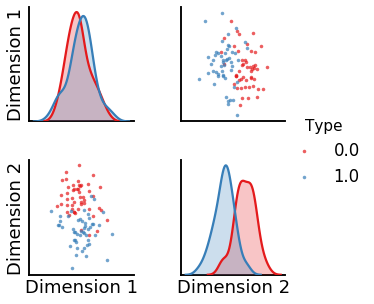

In [3]:
pairplot(GM.latent, GM.y)

## Linear Transformation

In [23]:
n_noise = 2
GM.sample_views(transform='linear', n_noise=n_noise)
GM2.sample_views(transform='linear', n_noise=n_noise)

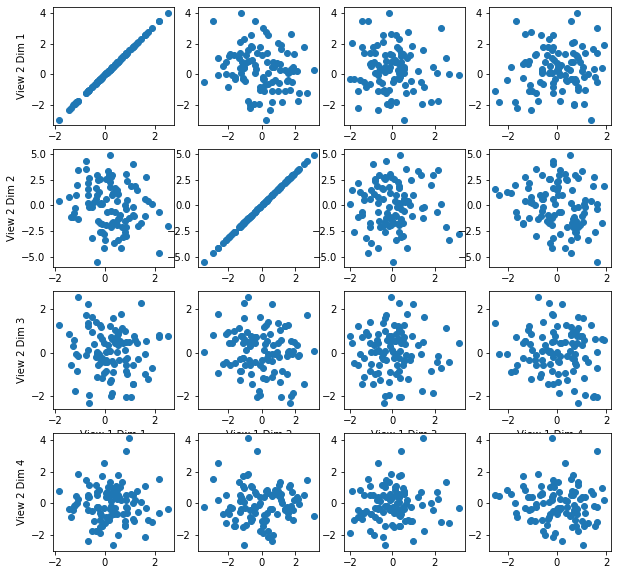

In [24]:
fig, axes = GM.plot_2views()
plt.show()

### Linear KCCA

In [29]:
# Initialize a linear kCCA class
kcca_l = KCCA(ktype ="linear", reg = 0.001, n_components = GM.Xs[0].shape[1])

# Use the fit.transform method to find a kCCA mapping and transform the views of data
kcca_l.fit(GM.Xs)
kcca_l = kcca_l.transform(GM2.Xs)

# Get attributes from the kCCA mapping on training data
weights = kcca_l.weights_
components = kcca_l.components_
correlations = kcca_l.cancorrs_

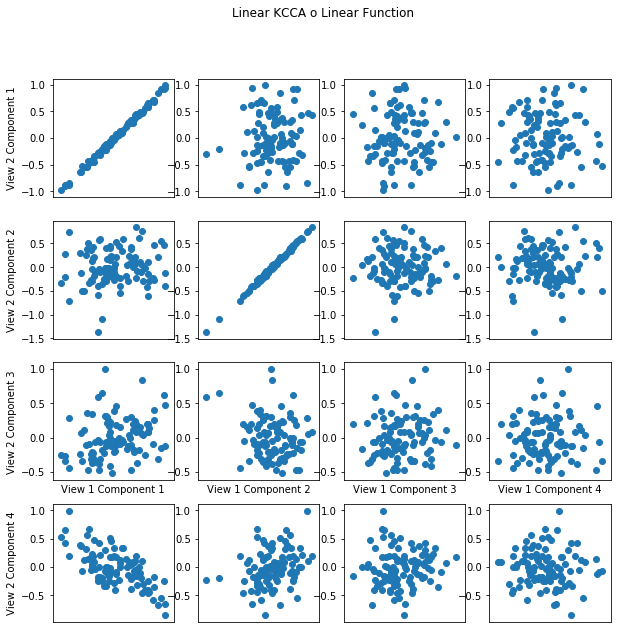

In [30]:
# We plot dimensions of both views to further show that the first two dimensions are linearly correlated
n_dim = components[0].shape[1]
fig,axes = plt.subplots(n_dim,n_dim,figsize=(10,10))
for i,ax in enumerate(axes.flatten()):
    dim2 = int(i/n_dim)
    dim1 = i % n_dim
    ax.scatter(components[0][:,dim1],components[1][:,dim2])
    #ax.set_title('Dimension 1')
    if dim2 == 2:
        ax.set_xlabel(f'View 1 Component {dim1+1}')
    if dim1 == 0:
        ax.set_ylabel(f'View 2 Component {dim2+1}')
    ax.set_xticks([])

plt.suptitle('Linear KCCA o Linear Function')
plt.show()

## Nonlinear: polynomial

In [41]:
n_noise = 2
GM.sample_views(transform='polyinv', n_noise=n_noise)
GM2.sample_views(transform='polyinv', n_noise=n_noise)

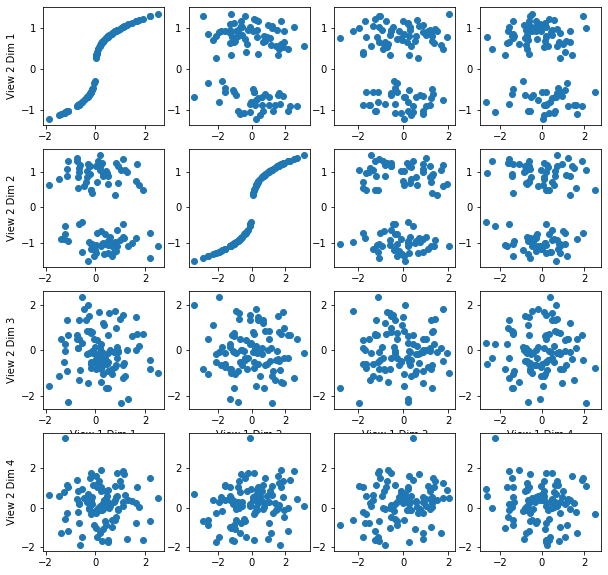

In [42]:
fig, axes = GM.plot_2views()
plt.show()

In [43]:
# Initialize a linear kCCA class
kcca = KCCA(ktype = "poly", reg = 0.001, n_components = GM.Xs[0].shape[1])

# Use the fit.transform method to find a kCCA mapping and transform the views of data
kcca.fit(GM.Xs)
kcca = kcca_l.transform(GM2.Xs)

# Get attributes from the kCCA mapping on training data
weights = kcca.weights_
components = kcca.components_
correlations = kcca.cancorrs_

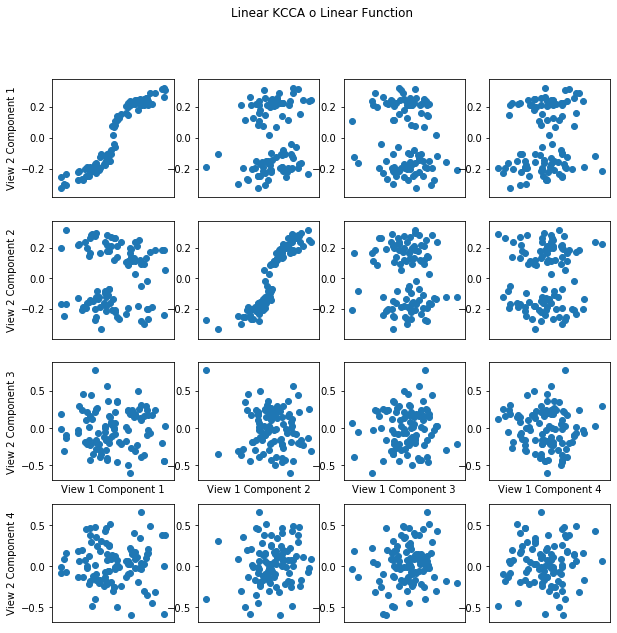

In [44]:
# We plot dimensions of both views to further show that the first two dimensions are linearly correlated
n_dim = components[0].shape[1]
fig,axes = plt.subplots(n_dim,n_dim,figsize=(10,10))
for i,ax in enumerate(axes.flatten()):
    dim2 = int(i/n_dim)
    dim1 = i % n_dim
    ax.scatter(components[0][:,dim1],components[1][:,dim2])
    #ax.set_title('Dimension 1')
    if dim2 == 2:
        ax.set_xlabel(f'View 1 Component {dim1+1}')
    if dim1 == 0:
        ax.set_ylabel(f'View 2 Component {dim2+1}')
    ax.set_xticks([])

plt.suptitle('Linear KCCA o Linear Function')
plt.show()

## Nonlinear: Sin

In [37]:
n_noise = 2
GM.sample_views(transform='sin', n_noise=n_noise)
GM2.sample_views(transform='sin', n_noise=n_noise)

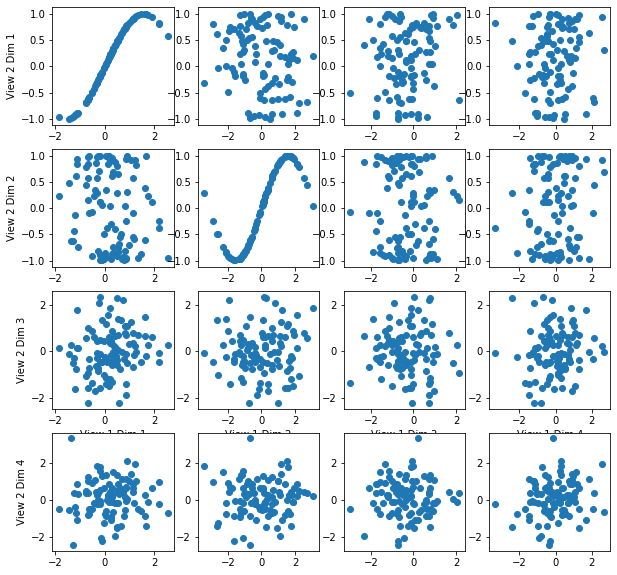

In [38]:
fig, axes = GM.plot_2views()
plt.show()

In [39]:
# Initialize a linear kCCA class
kcca = KCCA(ktype = "poly", reg = 0.001, n_components = GM.Xs[0].shape[1])

# Use the fit.transform method to find a kCCA mapping and transform the views of data
kcca.fit(GM.Xs)
kcca = kcca_l.transform(GM2.Xs)

# Get attributes from the kCCA mapping on training data
weights = kcca.weights_
components = kcca.components_
correlations = kcca.cancorrs_

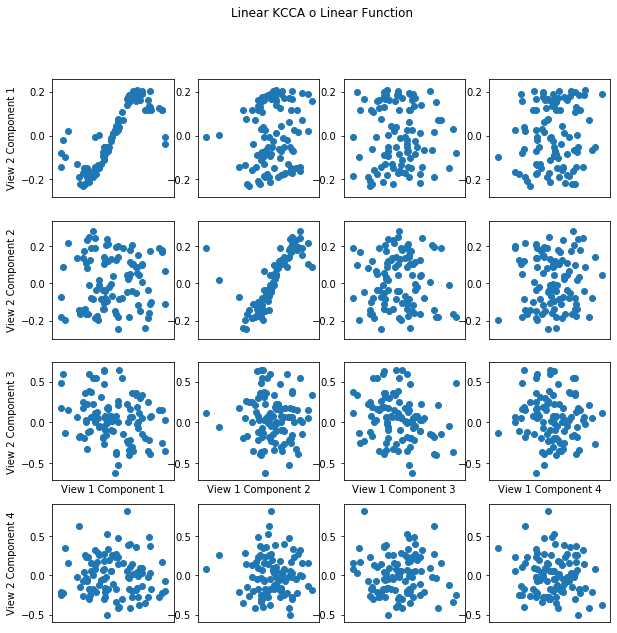

In [40]:
# We plot dimensions of both views to further show that the first two dimensions are linearly correlated
n_dim = components[0].shape[1]
fig,axes = plt.subplots(n_dim,n_dim,figsize=(10,10))
for i,ax in enumerate(axes.flatten()):
    dim2 = int(i/n_dim)
    dim1 = i % n_dim
    ax.scatter(components[0][:,dim1],components[1][:,dim2])
    #ax.set_title('Dimension 1')
    if dim2 == 2:
        ax.set_xlabel(f'View 1 Component {dim1+1}')
    if dim1 == 0:
        ax.set_ylabel(f'View 2 Component {dim2+1}')
    ax.set_xticks([])

plt.suptitle('Linear KCCA o Linear Function')
plt.show()